**Gender (Binary) Classifier** : Gender classification using Convolutional Neural Networks (CNNs) is a cutting-edge application of deep learning technology that aims to predict the gender of individuals from images. CNNs are a type of deep neural network specifically designed for image recognition tasks, making them well-suited for this purpose.
The gender classifier starts by inputting an image into the CNN, which then undergoes a series of convolutional, pooling, and fully connected layers. During the convolutional layers, the network automatically learns to extract relevant features from the input image, such as facial structures, hair patterns, and other discriminative traits related to gender.
Gender classifiers using CNNs find various applications, including demographic analysis, targeted advertising, and facial recognition systems. However, it is essential to ensure these models are trained on diverse and unbiased datasets to avoid perpetuating societal biases and ensure fair and ethical use of the technology.

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import scipy

# Directory with our training horse pictures
train_male_dir = os.path.join('../Dir/Male')

# Directory with our training human pictures
train_female_dir = os.path.join('../Dir/Female')

# No. Images Availible in Each Set
print('total training male images:', len(os.listdir(train_male_dir)))
print('total training female images:', len(os.listdir(train_female_dir)))

train_male_names = os.listdir(train_male_dir)
train_female_names = os.listdir(train_female_dir)


total training male images: 2730
total training female images: 2708


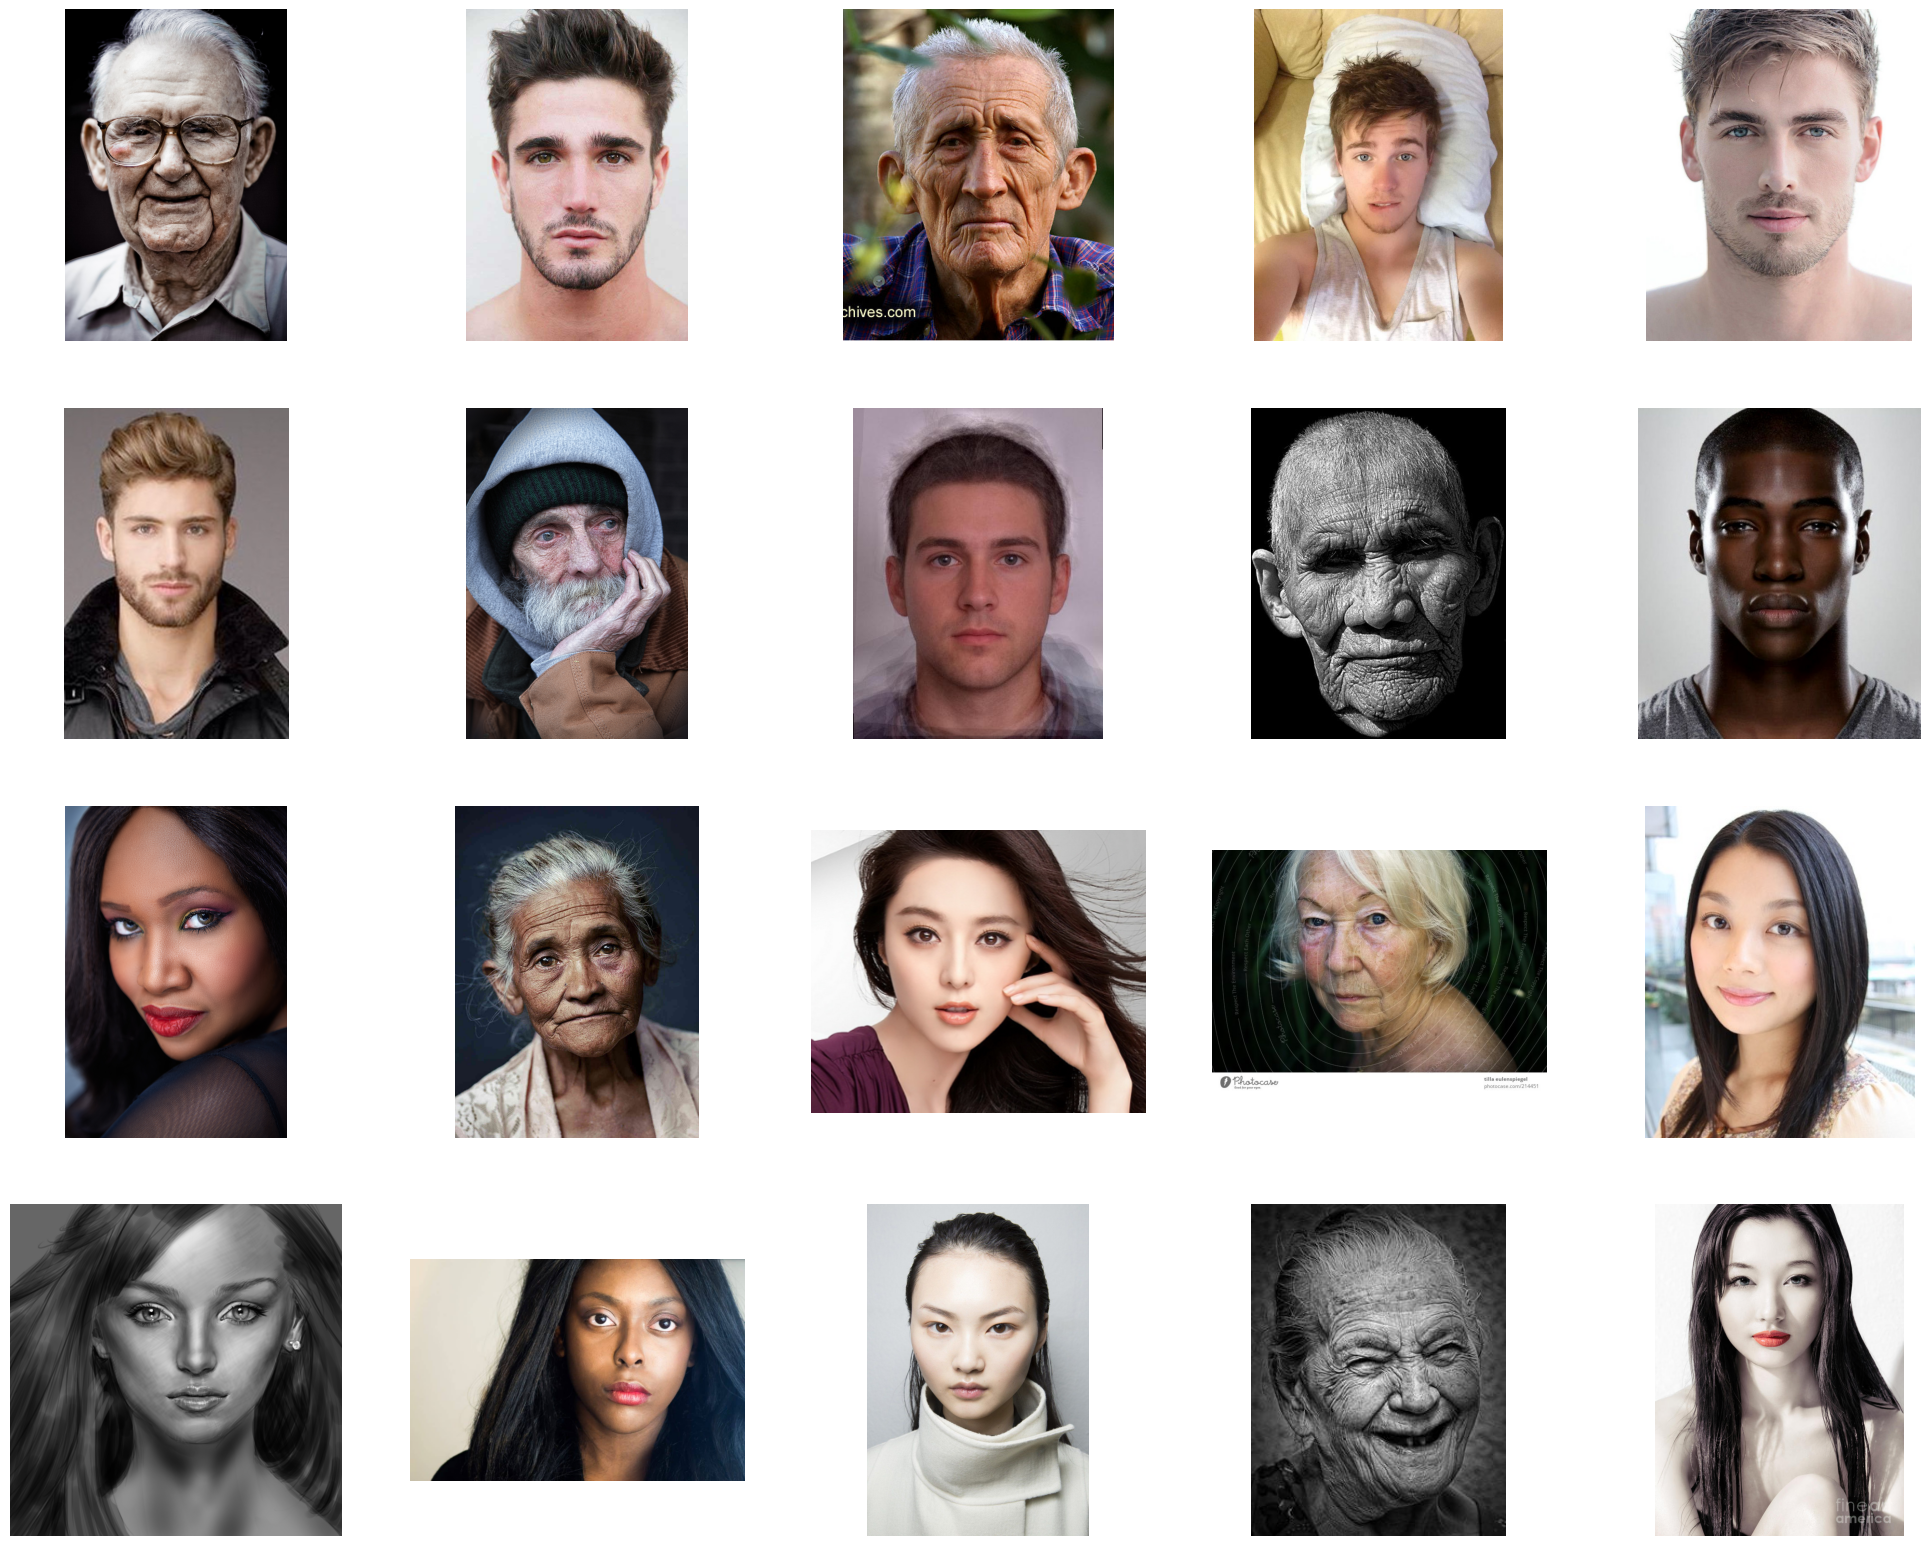

In [2]:
# Parameters for our graph; we'll output images in a 5x5 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 5x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)
pic_index += 10

next_male_pix = [os.path.join(train_male_dir, fname)
                for fname in train_male_names[pic_index-10:pic_index]]
next_female_pix = [os.path.join(train_female_dir, fname)
                for fname in train_female_names[pic_index-10:pic_index]]

for i, img_path in enumerate(next_male_pix+next_female_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
# plt.show()

In [3]:
# Convolutional neural network
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../Dir/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5438 images belonging to 2 classes.


In [5]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=40,
      verbose=1)

Epoch 1/40
8/8 [==============================] - 16s 2s/step - loss: 0.7754 - accuracy: 0.5098
Epoch 2/40
3/8 [==========>...................] - ETA: 9s - loss: 0.6933 - accuracy: 0.5000 

G:\Course Contents\Pyhton\GenderBinaryClassifier\venv\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 16s 2s/step - loss: 0.6932 - accuracy: 0.5293
Epoch 3/40
8/8 [==============================] - 15s 2s/step - loss: 0.6906 - accuracy: 0.5137
Epoch 4/40
8/8 [==============================] - 15s 2s/step - loss: 0.6848 - accuracy: 0.5647
Epoch 5/40
8/8 [==============================] - 15s 2s/step - loss: 0.6504 - accuracy: 0.6094
Epoch 6/40
8/8 [==============================] - 14s 2s/step - loss: 0.6377 - accuracy: 0.6250
Epoch 7/40
8/8 [==============================] - 15s 2s/step - loss: 0.7071 - accuracy: 0.6094
Epoch 8/40
8/8 [==============================] - 16s 2s/step - loss: 0.6312 - accuracy: 0.6484
Epoch 9/40
8/8 [==============================] - 14s 2s/step - loss: 0.5360 - accuracy: 0.7402
Epoch 10/40
8/8 [==============================] - 14s 2s/step - loss: 0.5745 - accuracy: 0.7129
Epoch 11/40
8/8 [==============================] - 14s 2s/step - loss: 0.5617 - accuracy: 0.7207
Epoch 12/40
8/8 [==============================] 

Enter the file path of the image:  ../Samples/OLDM.png


1/1 [==============================] - 0s 24ms/step
[0.9992715]
This image is a male


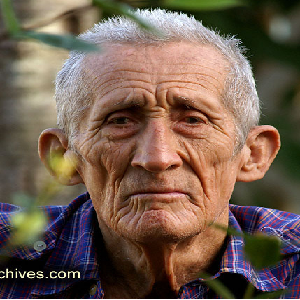

In [16]:
import numpy as np
from PIL import Image
from tensorflow.keras.utils import load_img, img_to_array



def process_image(file_path):
    img = load_img(file_path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print (classes[0])

    if classes[0] > 0.5:
        print("This image is a male")
    else:
        print("This image is a female")
    display(img)  # Display the uploaded image

# Input file path manually
file_path = input("Enter the file path of the image: ")
process_image(file_path)

